In [1]:
# import the depedencies
import numpy as np
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
import webrtcvad
from scipy.io import wavfile

In [2]:
file_path = '/Users/yashj.bonde/Desktop/ML/Audio_Vinay/Samples/Sample3.m4a'
y, sr = librosa.load(file_path)
y = librosa.core.to_mono(y)

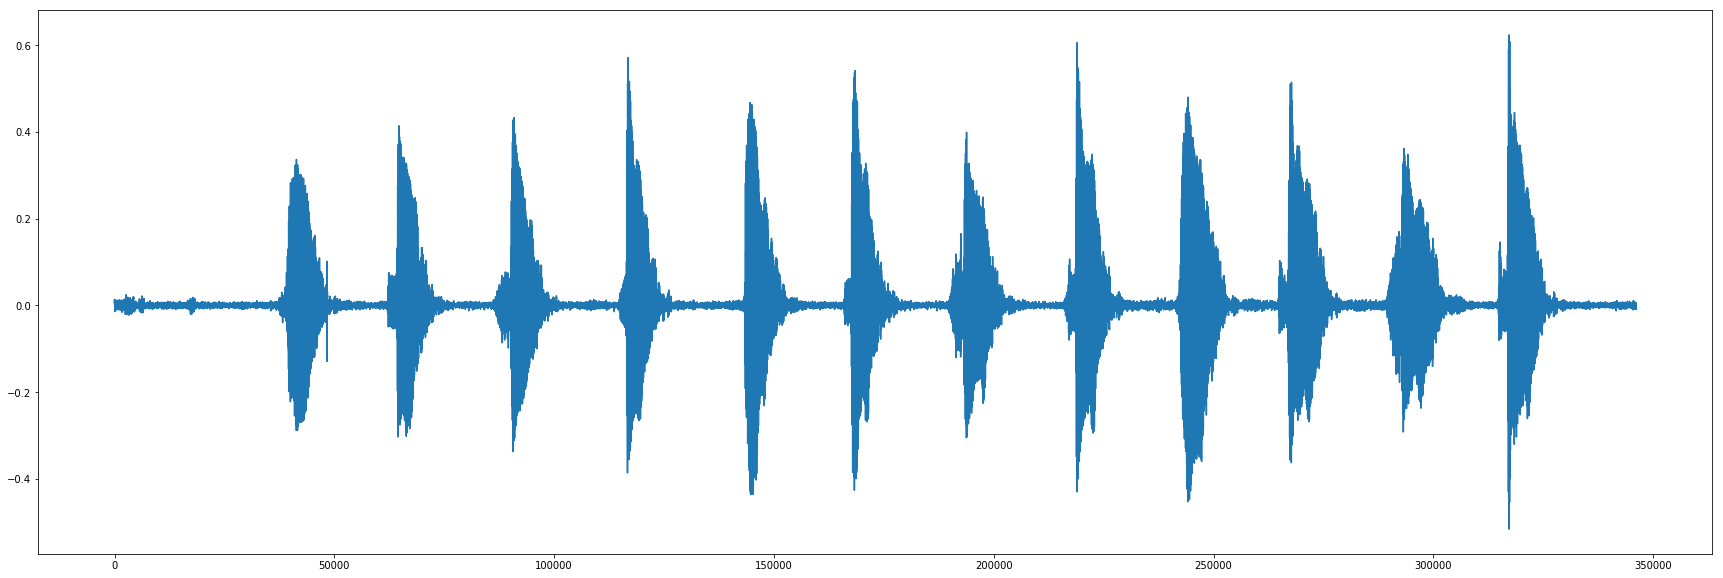

In [3]:
plt.figure(figsize = (30, 10))
plt.plot(y)

In [4]:
y_norm = y * 32768 # we need to convert it to 16-bit mono PCM Audio

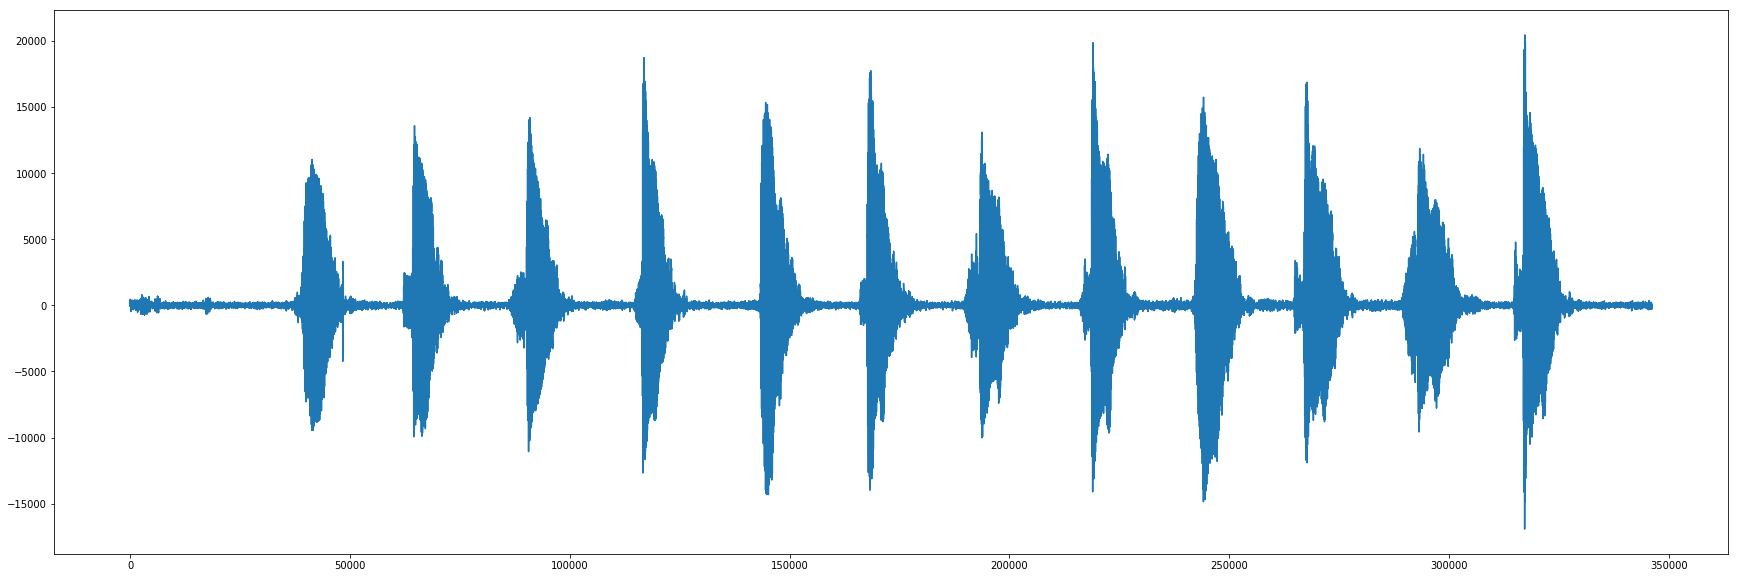

In [5]:
plt.figure(figsize = (30, 10))
plt.plot(y_norm)

In [6]:
y_norm_16 = np.array([i for i in y_norm], dtype = np.int16)

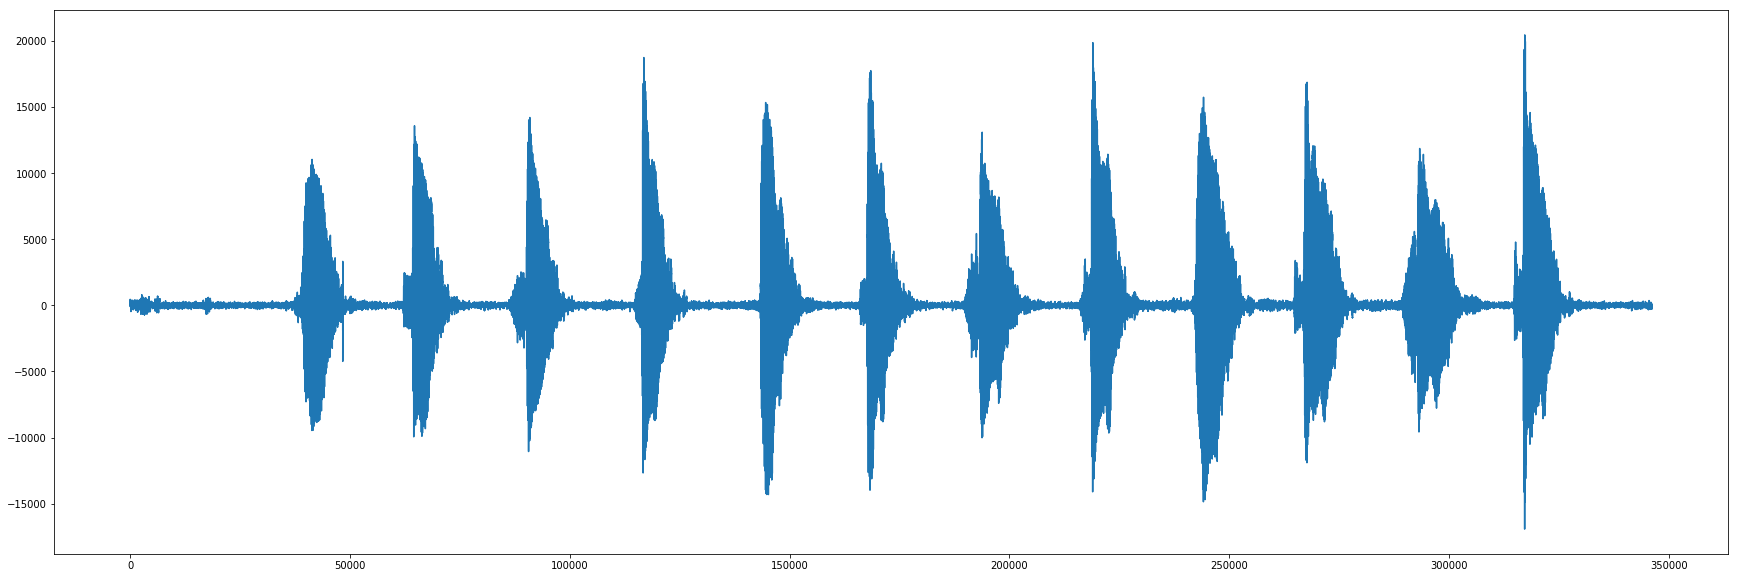

In [7]:
plt.figure(figsize = (30, 10))
plt.plot(y_norm_16)

In [8]:
# getting segments
# parameters
clip_len = 20 # ms
num_segments = int(sr * clip_len / 1000)
segments = []
for i in range(num_segments - 1):
    seg = y_norm_16[i*num_segments: (i+1)*num_segments]
    segments.append(seg)

In [11]:
segments_binary = []
for seg in segments:
    segments_binary.append(np.array(seg).tobytes())

In [14]:
sample_rate = 16000
vad = webrtcvad.Vad()
vad.set_mode(3)

In [16]:
vad.is_speech(segments_binary[0], sr)

Error: Error while processing frame

In [ ]:
def get_energy_validator_list(x, threshold = 45):
    '''
    Return a list of segments of all the points that are above a threshold value in array 'x'.
    '''
    

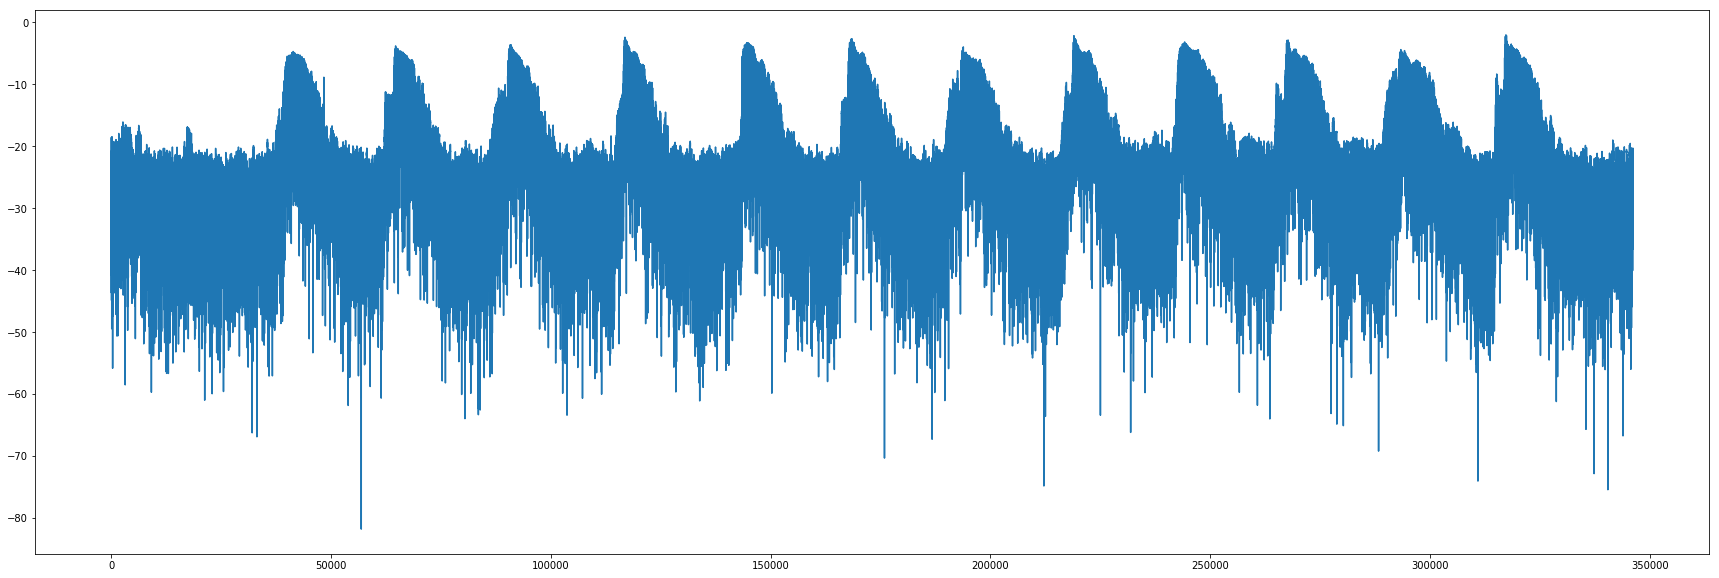

In [21]:
plt.figure(figsize = (30, 10))
plt.plot(librosa.core.power_to_db(y))

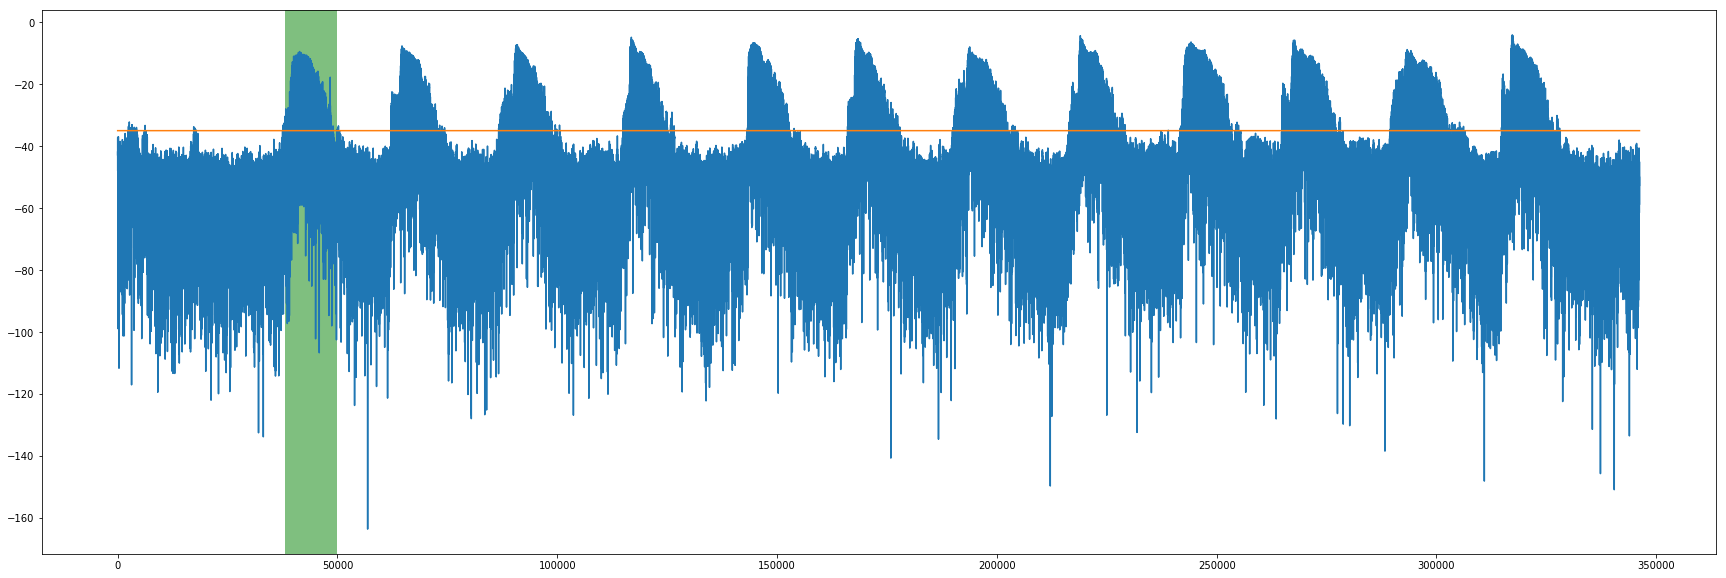

In [31]:
plt.figure(figsize = (30, 10))
plt.plot(np.log10(y ** 2) * 10)
plt.plot([-35 for _ in range(len(y))])
plt.axvspan(xmin = 38000, xmax = 50000, facecolor = 'g', alpha = 0.5)